Load Data

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
#locate files
dataset = r'D:\VP\ARTICLE2\Data'
IGTfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'IGT' in f]
meanfiles = [r'{}\{}'.format(dataset,f) for f in os.listdir(dataset) if 'mean' in f]

IGTfiles

['D:\\VP\\ARTICLE2\\Data\\A_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\A_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\B_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\C_IGTG3.csv',
 'D:\\VP\\ARTICLE2\\Data\\L_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\L_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG0.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG1.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG2.csv',
 'D:\\VP\\ARTICLE2\\Data\\Z_IGTG3.csv']

In [5]:
#Create dataframe for IGT values for 10 hour index
IGT = pd.DataFrame(index = np.arange(10*60*3),columns = np.arange(len(IGTfiles)))
means = pd.DataFrame(index = np.arange(10*60*3),columns = np.arange(len(meanfiles)))

# datafile = pd.read_csv(IGTfiles[0],names = ['seconds','IGT'],index_col = 0).values

#readdata
for i,col in enumerate(IGT.columns):
    IGTdata = pd.read_csv(IGTfiles[i],names = ['seconds','IGT'],index_col = 0)
    meandata = pd.read_csv(meanfiles[i],names = ['seconds','mean'],index_col = 0)
    IGT[col].iloc[:min(10*60*3,len(IGTdata))] = np.array(IGTdata.iloc[:min(10*60*3,len(IGTdata))]['IGT'])
    means[col].iloc[:min(10*60*3,len(meandata))] = np.array(meandata.iloc[:min(10*60*3,len(meandata))]['mean'])

IGT.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,62.61636,0.0,0.0,0.0,0.0,0.370272,0.0,0.0,0.38788,0.0,0.0,298.035913,6.051846,0.0,0.0
1,0.0,0.0,0.0,100.927139,0.0,0.0,0.0,0.0,9.92565,0.0,0.0,34.72686,0.0,0.0,796.681673,139.648973,37.325176,0.0
2,0.0,0.0,0.802099,221.878899,0.0,0.0,0.0,0.0,35.020554,0.0,0.880782,67.771587,0.0,0.0,1418.403647,336.385556,1120.30561,0.0
3,0.0,0.0,0.802099,474.862935,0.0,0.0,0.0,0.0,192.619702,3.173742,22.926859,198.643655,0.0,0.0,1879.0361,809.788518,2386.372979,0.0
4,0.0,0.0,0.802099,545.762018,0.0,0.0,0.0,0.063529,351.050187,3.173742,406.998346,294.711039,0.0,0.0,2095.053098,1538.471185,3261.218967,0.0


Plot Copper

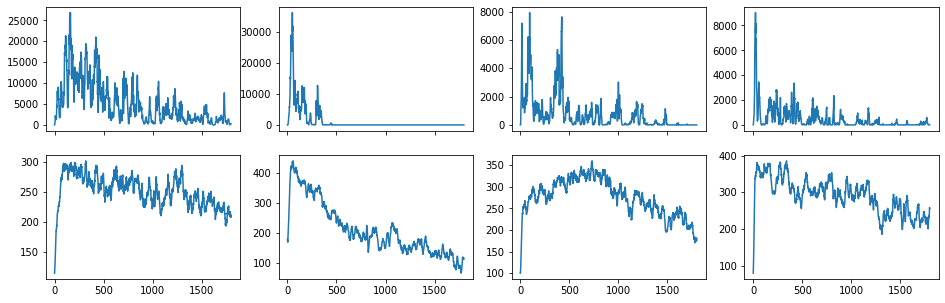

In [6]:
copp_cols = [8,9,10,11]
fig_copp,ax_copp = plt.subplots(2,4,figsize = (16,5),sharex = True)
for a,i in enumerate(copp_cols): 
    ax_copp[0,a].plot(IGT[i])
    ax_copp[1,a].plot(means[i])

Plot Zinc

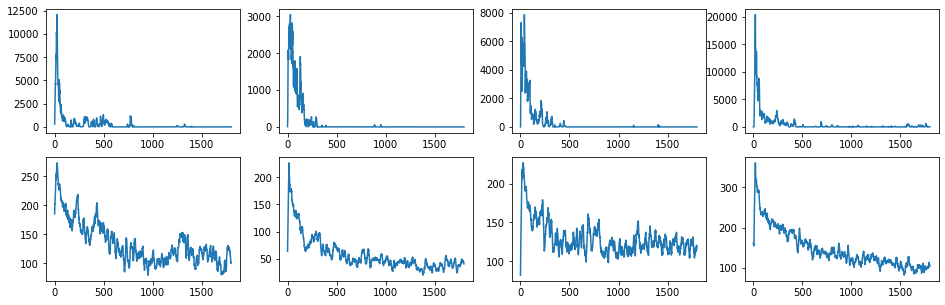

In [7]:
zinc_cols = [14,15,16,17]
fig_zinc,ax_zinc = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(zinc_cols): 
    ax_zinc[0,a].plot(IGT[i])
    ax_zinc[1,a].plot(means[i])

Plot Lindane - 2 missing data files

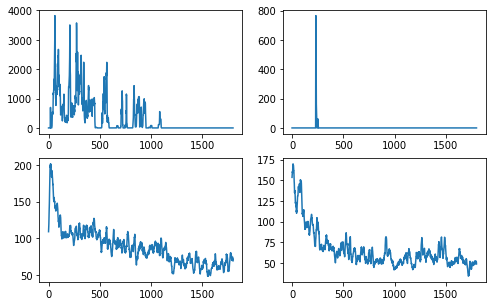

In [8]:
lind_cols = [12,13]
fig_lind,ax_lind = plt.subplots(2,2,figsize = (8,5))
for a,i in enumerate(lind_cols): 
    ax_lind[0,a].plot(IGT[i])
    ax_lind[1,a].plot(means[i])

Plot alphaEndosulfan

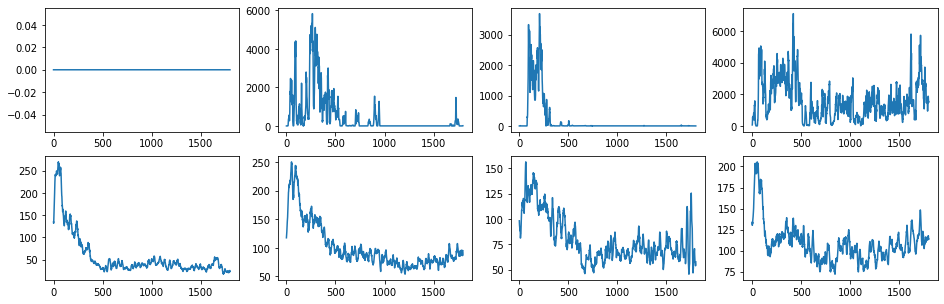

In [9]:
alphaE_cols = [0,1,2,3]
fig_alphaE,ax_alphaE = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(alphaE_cols): 
    ax_alphaE[0,a].plot(IGT[i])
    ax_alphaE[1,a].plot(means[i])

Plot betaEndosulfan

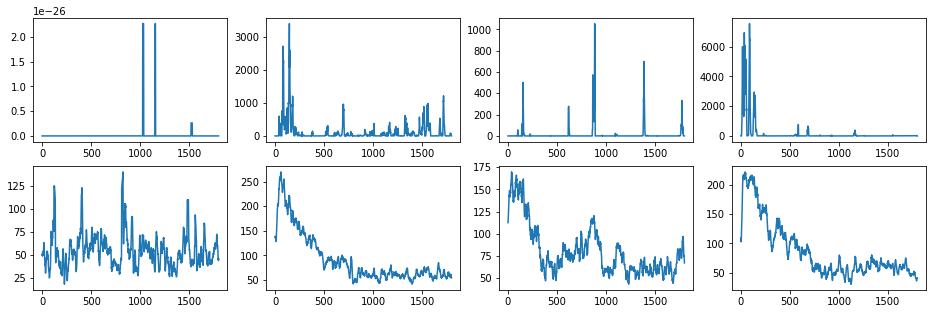

In [10]:
betaE_cols = [4,5,6,7]
fig_betaE,ax_betaE = plt.subplots(2,4,figsize = (16,5))
for a,i in enumerate(betaE_cols): 
    ax_betaE[0,a].plot(IGT[i])
    ax_betaE[1,a].plot(means[i])

In [11]:
#Rename columns with codes
cols = ['a0','a1','a2','a3','b0','b1','b2','b3','c0','c1','c2','c3','l0','l1','z0','z1','z2','z3']
IGT.columns,means.columns = cols,cols

FDA Smoothing of curves - Starting with IGT

In [12]:
import skfda
from skfda.misc.hat_matrix import (
    NadarayaWatsonHatMatrix,
)
from skfda.misc.kernels import uniform
from skfda.preprocessing.smoothing import KernelSmoother
from skfda.preprocessing.smoothing.validation import SmoothingParameterSearch
from skfda.representation.grid import FDataGrid

## Casting data matrix

It is important to specify this is a float, it removes close to zero wasted memory, and makes the datatype of the data matrix numeric, which is necessary for clustering or FPCA

In [41]:
#convert IGTs to fdatagrid
IGT_data_matrix = [np.around(np.array(IGT[col],dtype = np.float64),decimals = 3) for col in IGT.columns]
IGT_grid_points = [i for i in range(IGT.shape[0])]
IGT_fd = FDataGrid(IGT_data_matrix,IGT_grid_points,
                   dataset_name = 'IGTdata',
                   argument_names = ('time',),
                   coordinate_names = ('IGT',)
                   )
IGT_fd

FDataGrid(
    array([[[0.000000e+00],
            [0.000000e+00],
            [0.000000e+00],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[0.000000e+00],
            [0.000000e+00],
            [0.000000e+00],
            ...,
            [9.809000e+00],
            [9.809000e+00],
            [1.049100e+01]],
    
           [[0.000000e+00],
            [0.000000e+00],
            [8.020000e-01],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           ...,
    
           [[6.052000e+00],
            [1.396490e+02],
            [3.363860e+02],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[0.000000e+00],
            [3.732500e+01],
            [1.120306e+03],
            ...,
            [0.000000e+00],
            [0.000000e+00],
            [0.000000e+00]],
    
           [[

#### Cast data to means functional data grid also

In [42]:
means_data_matrix = [np.around(np.array(means[col],dtype = np.float64),decimals = 3) for col in means.columns]
means_grid_points = [i for i in range(means.shape[0])]
means_fd = FDataGrid(means_data_matrix,means_grid_points,
                   dataset_name = 'meandata',
                   argument_names = ('time',),
                   coordinate_names = ('means',)
                   )

In [43]:
#Define categories for FDA
y_IGT = [c[0] for c in IGT.columns]
y_means = [c[0] for c in means.columns]
mapping = {'a':0,'b':1,'c':2,'l':3,'z':4}
categories = [*mapping]
y_IGT = np.array([mapping[l] for l in y_IGT])
y_means = np.array([mapping[l] for l in y_means])

y_IGT

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4])

In [44]:
# Nadaraya-Watson kernel smoothing for IGT
"""
import math
n_neighbors = np.arange(2, 24)
dist = IGT_fd.grid_points[0][1] - IGT_fd.grid_points[0][0]
bandwidth = np.linspace(
    dist,
    dist * (math.ceil((n_neighbors[-1] - 1) / 2)),
    len(n_neighbors),
)

nw = SmoothingParameterSearch(
    KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix()),
    bandwidth,
    param_name='kernel_estimator__bandwidth',
)
nw.fit(IGT_fd)
nw_fd = nw.transform(IGT_fd)
"""

"\nimport math\nn_neighbors = np.arange(2, 24)\ndist = IGT_fd.grid_points[0][1] - IGT_fd.grid_points[0][0]\nbandwidth = np.linspace(\n    dist,\n    dist * (math.ceil((n_neighbors[-1] - 1) / 2)),\n    len(n_neighbors),\n)\n\nnw = SmoothingParameterSearch(\n    KernelSmoother(kernel_estimator=NadarayaWatsonHatMatrix()),\n    bandwidth,\n    param_name='kernel_estimator__bandwidth',\n)\nnw.fit(IGT_fd)\nnw_fd = nw.transform(IGT_fd)\n"

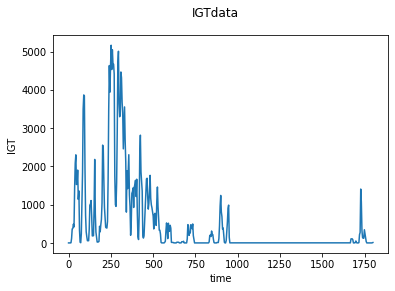

In [45]:
#better smoothing (oversmoothed)
IGT_fd[1].plot()
plt.show()

In [46]:
IGT_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(IGT_fd)

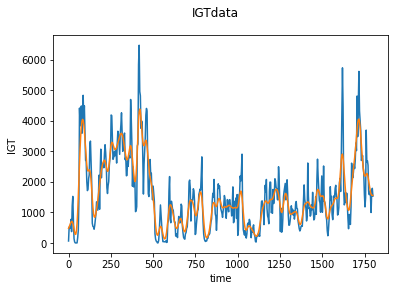

In [47]:
fig = IGT_fd[3].plot()
IGT_fd_smooth[3].plot(fig = fig)
plt.show()

Alpha Endosulfan smoothing result

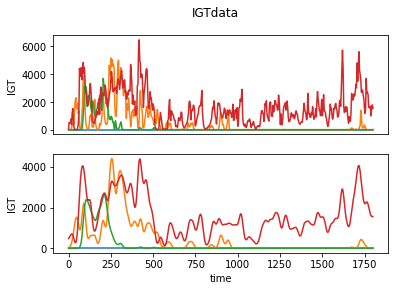

In [48]:
#kernal smoothing
fig, ax = plt.subplots(2)
IGT_fd[:4].plot(ax[0])
IGT_fd_smooth[:4].plot(ax[1])
# Disable xticks and xlabel of first image
ax[0].set_xticks([])
ax[0].set_xlabel('')
plt.show()

Repeat smoothing process for means

In [49]:
#REPEAT for means
#convert means to fdatagrid
means_fd_smooth = KernelSmoother(
    kernel_estimator=NadarayaWatsonHatMatrix(bandwidth = 10),
).fit_transform(means_fd)

Copper vs Lindane smoothing result with IGT and Mean

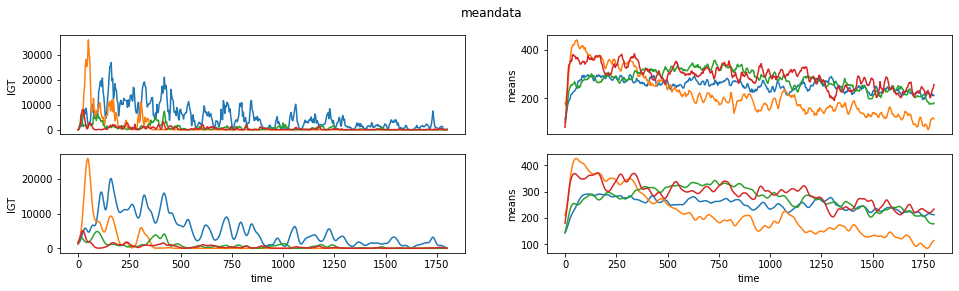

In [50]:
#kernal smoothing
fig, ax = plt.subplots(2,2,figsize = (16,4))

#IGT
IGT_fd[8:12].plot(ax[0,0])
IGT_fd_smooth[8:12].plot(ax[1,0])
# Disable xticks and xlabel of first image
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('')

#means
means_fd[8:12].plot(ax[0,1])
means_fd_smooth[8:12].plot(ax[1,1])
# Disable xticks and xlabel of first image
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('')

plt.show()

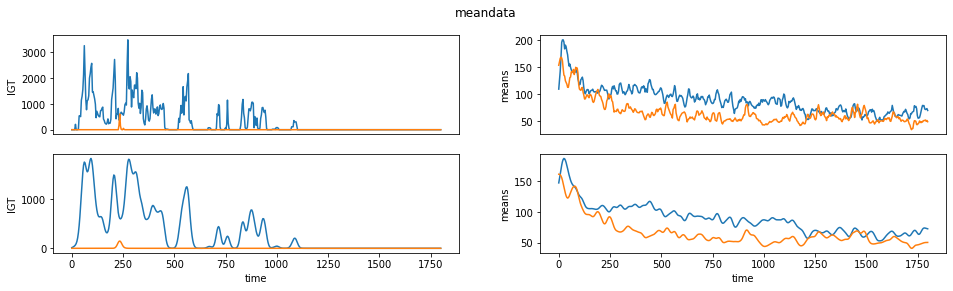

In [51]:
#kernal smoothing
fig, ax = plt.subplots(2,2,figsize = (16,4))

#IGT
IGT_fd[12:14].plot(ax[0,0])
IGT_fd_smooth[12:14].plot(ax[1,0])
# Disable xticks and xlabel of first image
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('')

#means
means_fd[12:14].plot(ax[0,1])
means_fd_smooth[12:14].plot(ax[1,1])
# Disable xticks and xlabel of first image
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('')

plt.show()

FPCA

In [56]:
from skfda.exploratory.visualization import FPCAPlot
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import (
    BSplineBasis,
)

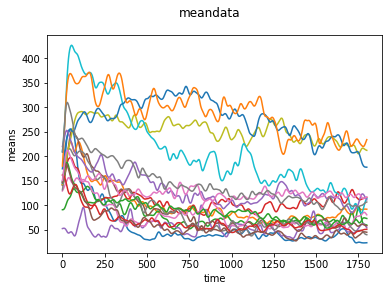

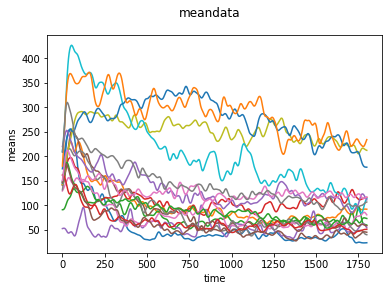

In [52]:
means_fd_smooth.plot()

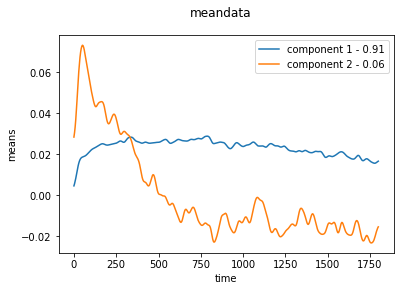

In [57]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(means_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

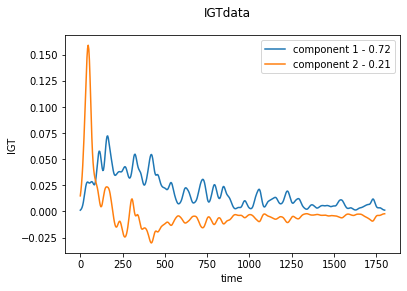

In [62]:
fpca_discretized = FPCA(n_components=2)
fpca_discretized.fit(IGT_fd_smooth)
fpca_discretized.components_.plot()
plt.legend(labels=['component 1 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[0]),'component 2 - {:.2f}'.format(fpca_discretized.explained_variance_ratio_[1])])

In [58]:
import seaborn as sns

### FCPA plot - by mean grouping

Hue code - 0: **aEndosulfan**   1: **bEndosulfan**   2: **Copper**   3: **Lindane**   4: **Zinc**  

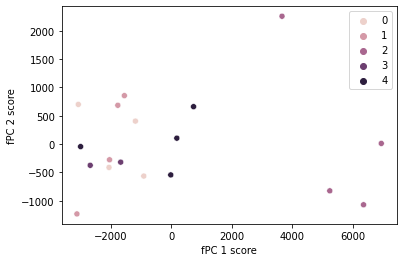

In [61]:
scores = fpca_discretized.fit_transform(means_fd_smooth)
sns.scatterplot(x=scores[:, 0], y=scores[:, 1],hue = y_IGT)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()

### FCPA plot - by IGT grouping

Hue code - 0: **aEndosulfan**   1: **bEndosulfan**   2: **Copper**   3: **Lindane**   4: **Zinc**  

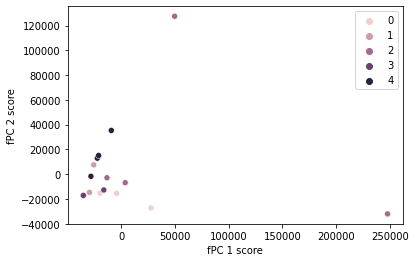

In [65]:
scores_IGT = fpca_discretized.fit_transform(IGT_fd_smooth)
sns.scatterplot(x=scores_IGT[:, 0], y=scores_IGT[:, 1],hue = y_IGT)
plt.xlabel("fPC 1 score")
plt.ylabel("fPC 2 score")
plt.title("")
plt.show()

DATA object - error - CHECK zeros

Clustering KNN - show concatenation

In [ ]:
#concatenate copper entry
IGT_arr = np.array(IGT_fd_smooth.data_matrix[8])
mean_arr = np.array(means_fd_smooth.data_matrix[8])

IGT_arr,mean_arr = IGT_arr/IGT_arr.max(),mean_arr/mean_arr.max()
concat_arr = np.vstack((IGT_arr,mean_arr))

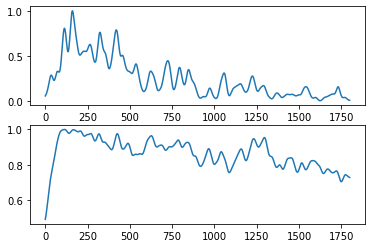

In [73]:
fig_,ax_ = plt.subplots(2,1)
ax_[0].plot(IGT_arr)
ax_[1].plot(mean_arr)
plt.show()

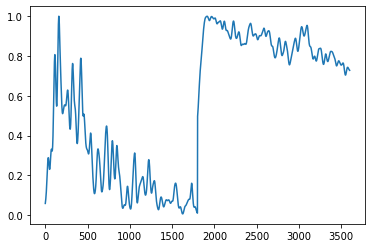

In [82]:
plt.plot(concat_arr)
plt.show()

This is what we expect to see

In [ ]:
cluster1 = [8,9,10,11]
cluster2 = [14,15,16,17]
cluster3 = [1,3,5,7]
cluster4 = [0,6,13]
cluster5 = [2,12]
cluster6 = [4]

big_clus1 = [8,9,10,11]
big_clus2 = [14,15,16,17]
big_clus3 = [1,3,5,7,0,6,13,2,12]
big_clus4 = [4]

Show KNN clusters

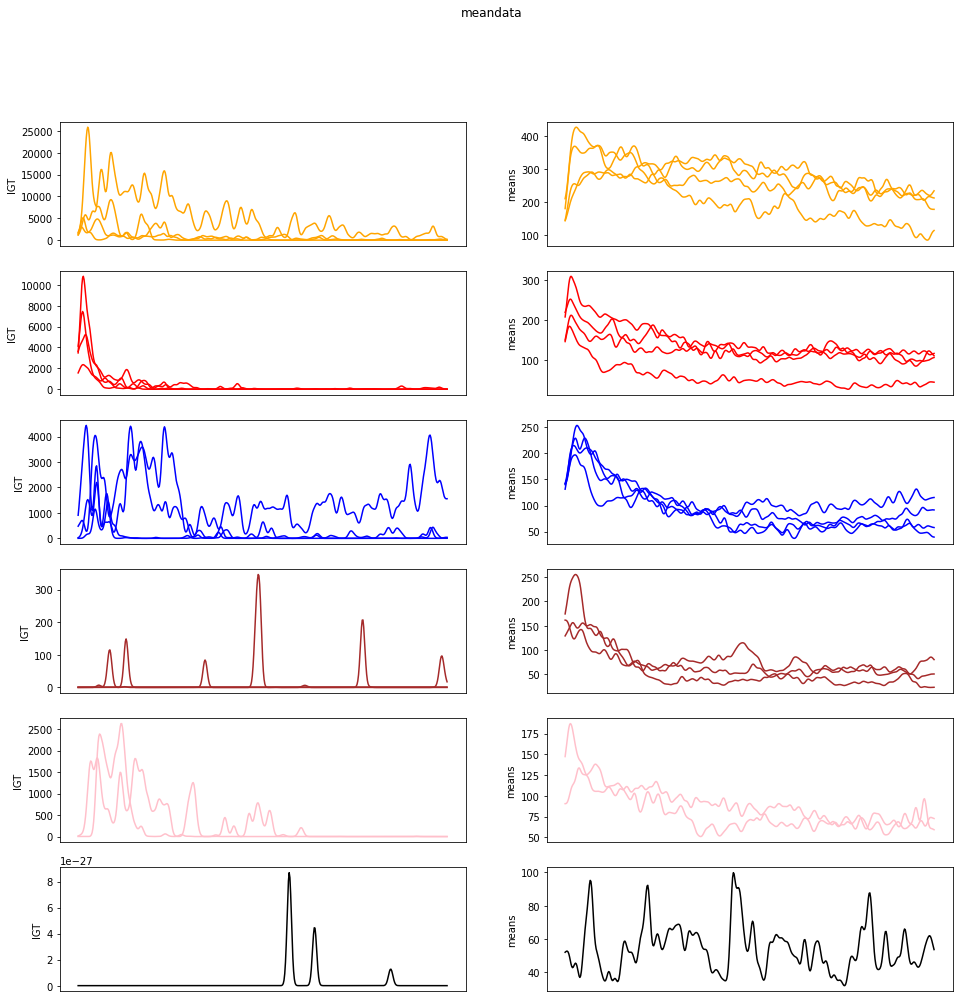

In [94]:
#kernal smoothing
fig, ax = plt.subplots(6,2,figsize = (16,16))

#cluster1
IGT_fd_smooth[[i for i in cluster1]].plot(ax[0,0],color = 'orange')
means_fd_smooth[[i for i in cluster1]].plot(ax[0,1],color = 'orange')
# Disable xticks and xlabel of first image
ax[0,0].set_xticks([])
ax[0,0].set_xlabel('')
ax[0,1].set_xticks([])
ax[0,1].set_xlabel('')

#cluster2
IGT_fd_smooth[[i for i in cluster2]].plot(ax[1,0],color = 'red')
means_fd_smooth[[i for i in cluster2]].plot(ax[1,1],color = 'red')
# Disable xticks and xlabel of first image
ax[1,0].set_xticks([])
ax[1,0].set_xlabel('')
ax[1,1].set_xticks([])
ax[1,1].set_xlabel('')

#cluster3
IGT_fd_smooth[[i for i in cluster3]].plot(ax[2,0],color = 'blue')
means_fd_smooth[[i for i in cluster3]].plot(ax[2,1],color = 'blue')
# Disable xticks and xlabel of first image
ax[2,0].set_xticks([])
ax[2,0].set_xlabel('')
ax[2,1].set_xticks([])
ax[2,1].set_xlabel('')

#cluster4
IGT_fd_smooth[[i for i in cluster4]].plot(ax[3,0],color = 'brown')
means_fd_smooth[[i for i in cluster4]].plot(ax[3,1],color = 'brown')
# Disable xticks and xlabel of first image
ax[3,0].set_xticks([])
ax[3,0].set_xlabel('')
ax[3,1].set_xticks([])
ax[3,1].set_xlabel('')

#cluster5
IGT_fd_smooth[[i for i in cluster5]].plot(ax[4,0],color = 'pink')
means_fd_smooth[[i for i in cluster5]].plot(ax[4,1],color = 'pink')
# Disable xticks and xlabel of first image
ax[4,0].set_xticks([])
ax[4,0].set_xlabel('')
ax[4,1].set_xticks([])
ax[4,1].set_xlabel('')

#cluster6
IGT_fd_smooth[[i for i in cluster6]].plot(ax[5,0],color = 'black')
means_fd_smooth[[i for i in cluster6]].plot(ax[5,1],color = 'black')
# Disable xticks and xlabel of first image
ax[5,0].set_xticks([])
ax[5,0].set_xlabel('')
ax[5,1].set_xticks([])
ax[5,1].set_xlabel('')

plt.show()

Cluster Formation?

In [103]:
print('Cluster1:', [IGT.columns[i] for i in cluster1])
print('Cluster2:', [IGT.columns[i] for i in cluster2])
print('Cluster3:', [IGT.columns[i] for i in cluster3])
print('Cluster4:', [IGT.columns[i] for i in cluster4])
print('Cluster5:', [IGT.columns[i] for i in cluster5])
print('Cluster6:', [IGT.columns[i] for i in cluster6])

Cluster1: ['c0', 'c1', 'c2', 'c3']
Cluster2: ['z0', 'z1', 'z2', 'z3']
Cluster3: ['a1', 'a3', 'b1', 'b3']
Cluster4: ['a0', 'b2', 'l1']
Cluster5: ['a2', 'l0']
Cluster6: ['b0']


In [104]:
print('Cluster1:', [IGT.columns[i] for i in big_clus1])
print('Cluster2:', [IGT.columns[i] for i in big_clus2])
print('Cluster3:', [IGT.columns[i] for i in big_clus3])
print('Cluster4:', [IGT.columns[i] for i in big_clus4])

Cluster1: ['c0', 'c1', 'c2', 'c3']
Cluster2: ['z0', 'z1', 'z2', 'z3']
Cluster3: ['a1', 'a3', 'b1', 'b3', 'a0', 'b2', 'l1', 'a2', 'l0']
Cluster4: ['b0']
